In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add parent directory to Python path to import our modules
sys.path.append('..')  # This goes up one level from Notebook/ to project root

# Import custom modules from parent directory
from data_loader import DataLoader
from data_cleaner import DataCleaner
from feature_engineer import FeatureEngineer
from model_builder import ModelBuilder
from explainer import ModelExplainer

# Setup visualization
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("All libraries imported successfully!")
print(f"Current working directory: {os.getcwd()}")
print(f"Files in directory: {os.listdir('.')}")

All libraries imported successfully!
Current working directory: f:\AI_Project
Files in directory: ['.pytest_cache', 'analysis_notebook.ipynb', 'data_cleaner.py', 'data_loader.py', 'dirty_transport_dataset.csv', 'explainer.py', 'explainer_shap_alignment.patch', 'feature_engineer.py', 'feature_importance_plot.png', 'model_builder.py', 'model_explainability_report.html', 'model_performance_comparison.png', 'NooteBook.ipynb', 'PATCH_README.md', 'requirements.txt', 'shap_summary_plot.png', 'shap_utils.py', 'tests', '__pycache__']


In [20]:
# Define the path to your dataset
# Since notebook is in Notebook/, dataset is in parent directory
data_path = '../dirty_transport_dataset.csv'

# Check if file exists
if os.path.exists(data_path):
    print(f"Dataset found at: {data_path}")
else:
    # If not found, try alternative path
    data_path = 'dirty_transport_dataset.csv'
    if os.path.exists(data_path):
        print(f"Dataset found at: {data_path}")
    else:
        print("Dataset not found. Please check the path.")

# Load the data
print("\n1. LOADING DATA...")
loader = DataLoader(data_path)
raw_data = loader.load_data()

# Display basic information
print("\n=== Dataset Information ===")
print(f"Shape: {raw_data.shape}")
print(f"Columns: {list(raw_data.columns)}")

# Display first few rows
print("\n=== First 5 Rows ===")
display(raw_data.head())

# Display data types and missing values
print("\n=== Data Types ===")
print(raw_data.dtypes)

print("\n=== Missing Values ===")
missing_values = raw_data.isnull().sum()
for col, count in missing_values.items():
    if count > 0:
        print(f"{col}: {count} missing ({count/len(raw_data)*100:.1f}%)")

# Display statistical summary
print("\n=== Statistical Summary ===")
display(raw_data.describe(include='all'))

# Save raw data info for later comparison
raw_shape = raw_data.shape
raw_missing = raw_data.isnull().sum().sum()

Dataset found at: dirty_transport_dataset.csv

1. LOADING DATA...

=== Dataset Information ===
Shape: (300, 7)
Columns: ['route_id', 'scheduled_time', 'actual_time', 'weather', 'passenger_count', 'latitude', 'longitude']

=== First 5 Rows ===


,route_id,scheduled_time,actual_time,weather,passenger_count,latitude,longitude
0,3,1/1/2025 0:00,1:22,SUN,250.0,999.000000,NaN
1,Route-4,1/1/2025 1:00,224,Sunny,250.0,24.643878,32.636296
2,R03,1/1/2025 2:00,345,sunny,250.0,24.363132,31.186819
3,Route-4,1/1/2025 3:00,529,cloudy,36.0,25.533071,32.537508
4,Route-4,1/1/2025 4:00,04.56AM,cloudy,76.0,23.294248,33.419211



=== Data Types ===
route_id            object
scheduled_time      object
actual_time         object
weather             object
passenger_count    float64
latitude           float64
longitude          float64
dtype: object

=== Missing Values ===
actual_time: 42 missing (14.0%)
weather: 38 missing (12.7%)
passenger_count: 27 missing (9.0%)
longitude: 6 missing (2.0%)

=== Statistical Summary ===


,route_id,scheduled_time,actual_time,weather,passenger_count,latitude,longitude
count,300,300,258,262,273.000000,300.000000,294.000000
unique,5,300,250,8,NaN,NaN,NaN
top,3,1/1/2025 0:00,1349,cloudy,NaN,NaN,NaN
freq,74,1,3,38,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,100.216117,43.991670,32.524776
std,NaN,NaN,NaN,NaN,108.573813,136.660343,0.870863
min,NaN,NaN,NaN,NaN,-5.000000,23.009655,31.004695
25%,NaN,NaN,NaN,NaN,-5.000000,23.775815,31.777112
50%,NaN,NaN,NaN,NaN,59.000000,24.562698,32.555248
75%,NaN,NaN,NaN,NaN,250.000000,25.268393,33.291209


In [12]:
print("2. DATA CLEANING...")
print("-" * 50)

# Initialize cleaner with raw data
cleaner = DataCleaner(raw_data)

# Run the complete cleaning pipeline
cleaned_data = cleaner.run_full_cleaning_pipeline()

# Display cleaning summary
print("\n=== Cleaning Summary ===")
cleaning_summary = cleaner.get_cleaning_summary()
for key, value in cleaning_summary.items():
    if key == 'cleaning_steps':
        print(f"\nCleaning Steps Performed ({len(value)}):")
        for i, step in enumerate(value, 1):
            print(f"  {i}. {step}")
    else:
        print(f"{key.replace('_', ' ').title()}: {value}")

# Display cleaned data info
print("\n=== Cleaned Data Info ===")
print(f"Shape: {cleaned_data.shape}")
print(f"Missing values remaining: {cleaned_data.isnull().sum().sum()}")

# Display new columns created during cleaning
new_columns = [col for col in cleaned_data.columns if col not in raw_data.columns]
print(f"\nNew columns created during cleaning: {new_columns}")

# Display first few rows of cleaned data
print("\n=== First 5 Rows of Cleaned Data ===")
display(cleaned_data.head())

# Display some key metrics after cleaning
print("\n=== Key Metrics After Cleaning ===")
if 'delay_minutes' in cleaned_data.columns:
    print(f"Average delay: {cleaned_data['delay_minutes'].mean():.2f} minutes")
    print(f"Maximum delay: {cleaned_data['delay_minutes'].max():.2f} minutes")
    print(f"Minimum delay: {cleaned_data['delay_minutes'].min():.2f} minutes")
    print(f"On-time arrivals (delay=0): {(cleaned_data['delay_minutes'] == 0).sum()} trips")

2. DATA CLEANING...
--------------------------------------------------

=== Cleaning Summary ===

Cleaning Steps Performed (2):
  1. created_delay_minutes_default_0
  2. normalized_weather
N Rows: 300
N Cols: 8

=== Cleaned Data Info ===
Shape: (300, 8)
Missing values remaining: 0

New columns created during cleaning: ['delay_minutes']

=== First 5 Rows of Cleaned Data ===


,route_id,scheduled_time,actual_time,weather,passenger_count,latitude,longitude,delay_minutes
0,3,1/1/2025 0:00,1:22,sun,250.0,999.000000,0.000000,0.0
1,Route-4,1/1/2025 1:00,224,sunny,250.0,24.643878,32.636296,0.0
2,R03,1/1/2025 2:00,345,sunny,250.0,24.363132,31.186819,0.0
3,Route-4,1/1/2025 3:00,529,cloudy,36.0,25.533071,32.537508,0.0
4,Route-4,1/1/2025 4:00,04.56AM,cloudy,76.0,23.294248,33.419211,0.0



=== Key Metrics After Cleaning ===
Average delay: 0.00 minutes
Maximum delay: 0.00 minutes
Minimum delay: 0.00 minutes
On-time arrivals (delay=0): 300 trips


In [15]:
print("3. FEATURE ENGINEERING...")
print("-" * 50)

# Initialize feature engineer with cleaned data
engineer = FeatureEngineer(cleaned_data)

# Run the complete feature engineering pipeline
engineered_data = engineer.run_full_feature_engineering()

# Get list of engineered features
engineered_features = engineer.get_feature_list()
print(f"Total engineered features created: {len(engineered_features)}")

# Display top 15 engineered features
print("\n=== Top 15 Engineered Features ===")
for i, feature in enumerate(engineered_features[:15], 1):
    print(f"{i:2}. {feature}")

# Display feature categories
print("\n=== Feature Categories ===")
feature_categories = {
    'Time Features': [f for f in engineered_features if any(kw in f for kw in ['hour', 'minute', 'time_', 'day_', 'month', 'weekend'])],
    'Weather Features': [f for f in engineered_features if 'weather' in f],
    'Route Features': [f for f in engineered_features if 'route' in f],
    'Spatial Features': [f for f in engineered_features if any(kw in f for kw in ['distance', 'latitude', 'longitude', 'north', 'east'])],
    'Interaction Features': [f for f in engineered_features if any(kw in f for kw in ['peak', 'load', 'morning_rain'])]
}

for category, features in feature_categories.items():
    if features:
        print(f"\n{category} ({len(features)}):")
        for feature in features[:5]:  # Show first 5 of each category
            print(f"  - {feature}")
        if len(features) > 5:
            print(f"  ... and {len(features)-5} more")

# Display engineered data structure
print("\n=== Engineered Data Structure ===")
print(f"Shape: {engineered_data.shape}")
print(f"Total columns: {len(engineered_data.columns)}")

# Show a sample of engineered features
print("\n=== Sample of Engineered Features (First 3 rows) ===")
sample_features = engineered_features[:10]  # Show first 10 engineered features
display(engineered_data[sample_features].head(3))

3. FEATURE ENGINEERING...
--------------------------------------------------
Total engineered features created: 4

=== Top 15 Engineered Features ===
 1. passenger_count
 2. latitude
 3. longitude
 4. scheduled_hour

=== Feature Categories ===

Time Features (1):
  - scheduled_hour

Spatial Features (2):
  - latitude
  - longitude

=== Engineered Data Structure ===
Shape: (300, 23)
Total columns: 23

=== Sample of Engineered Features (First 3 rows) ===


,passenger_count,latitude,longitude,scheduled_hour
0,250.0,999.000000,0.000000,0
1,250.0,24.643878,32.636296,1
2,250.0,24.363132,31.186819,2


In [19]:
# Debug: inspect engineered_data columns
print('Engineered columns:', engineered_data.columns.tolist())
print('\nSample row:')
display(engineered_data.head(3))

Engineered columns: ['scheduled_time', 'actual_time', 'passenger_count', 'latitude', 'longitude', 'delay_minutes', 'scheduled_hour', 'weather_clody', 'weather_cloudy', 'weather_nan', 'weather_rain', 'weather_rainy', 'weather_sun', 'weather_sunny', 'route_id_3', 'route_id_R03', 'route_id_R1', 'route_id_R2', 'route_id_Route-4', 'time_of_day_afternoon', 'time_of_day_evening', 'time_of_day_morning', 'time_of_day_night', 'time_of_day']

Sample row:


,scheduled_time,actual_time,passenger_count,latitude,longitude,delay_minutes,scheduled_hour,weather_clody,weather_cloudy,weather_nan,...,route_id_3,route_id_R03,route_id_R1,route_id_R2,route_id_Route-4,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,time_of_day_night,time_of_day
0,1/1/2025 0:00,1:22,250.0,999.000000,0.000000,0.0,0,False,False,False,...,True,False,False,False,False,False,False,False,True,night
1,1/1/2025 1:00,224,250.0,24.643878,32.636296,0.0,1,False,False,False,...,False,False,False,False,True,False,False,False,True,night
2,1/1/2025 2:00,345,250.0,24.363132,31.186819,0.0,2,False,False,False,...,False,True,False,False,False,False,False,False,True,night


4. EXPLORATORY DATA ANALYSIS (EDA)...
--------------------------------------------------
1. Analyzing Delay Distribution...


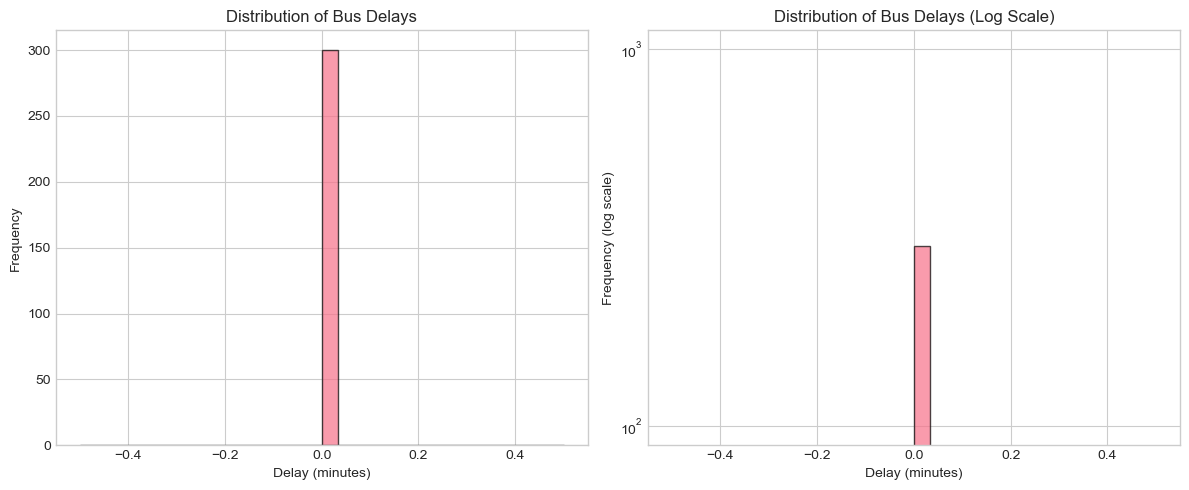


2. Analyzing Delay by Time of Day...


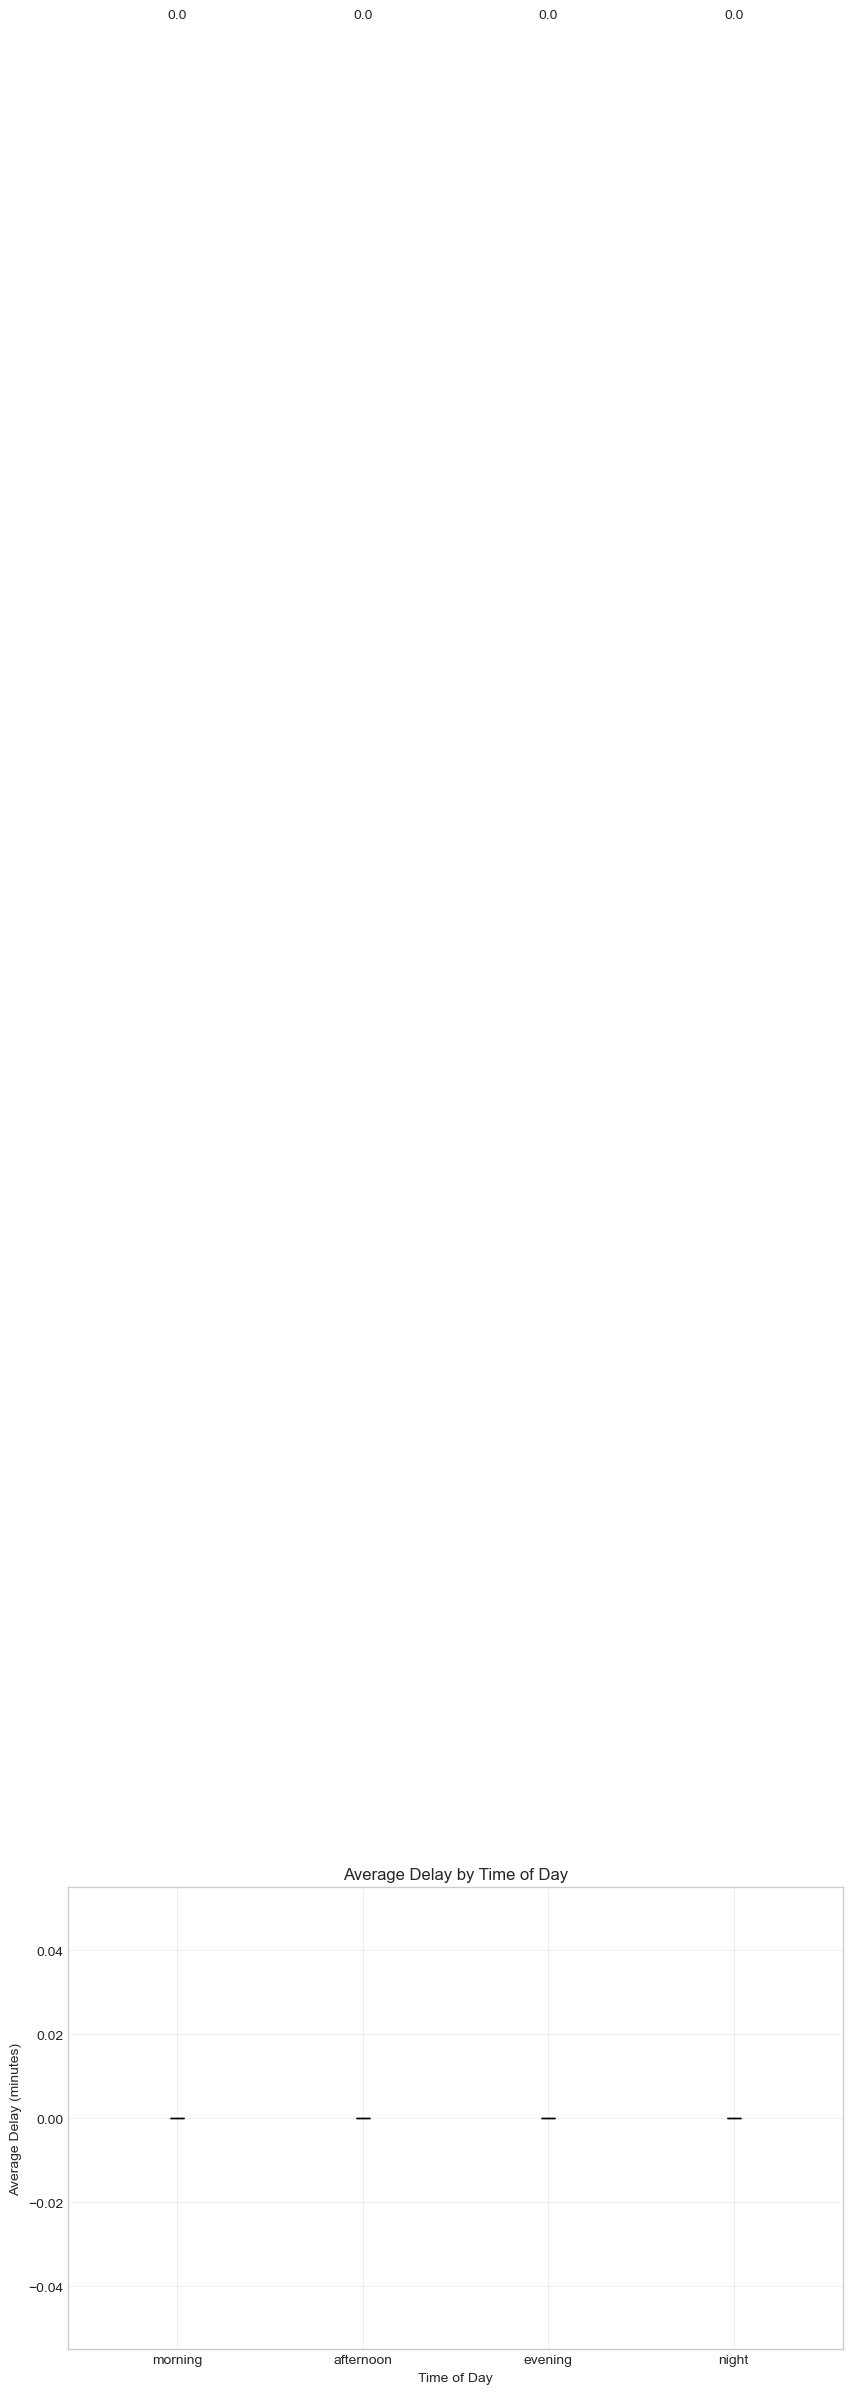


3. Analyzing Delay by Weather Condition...


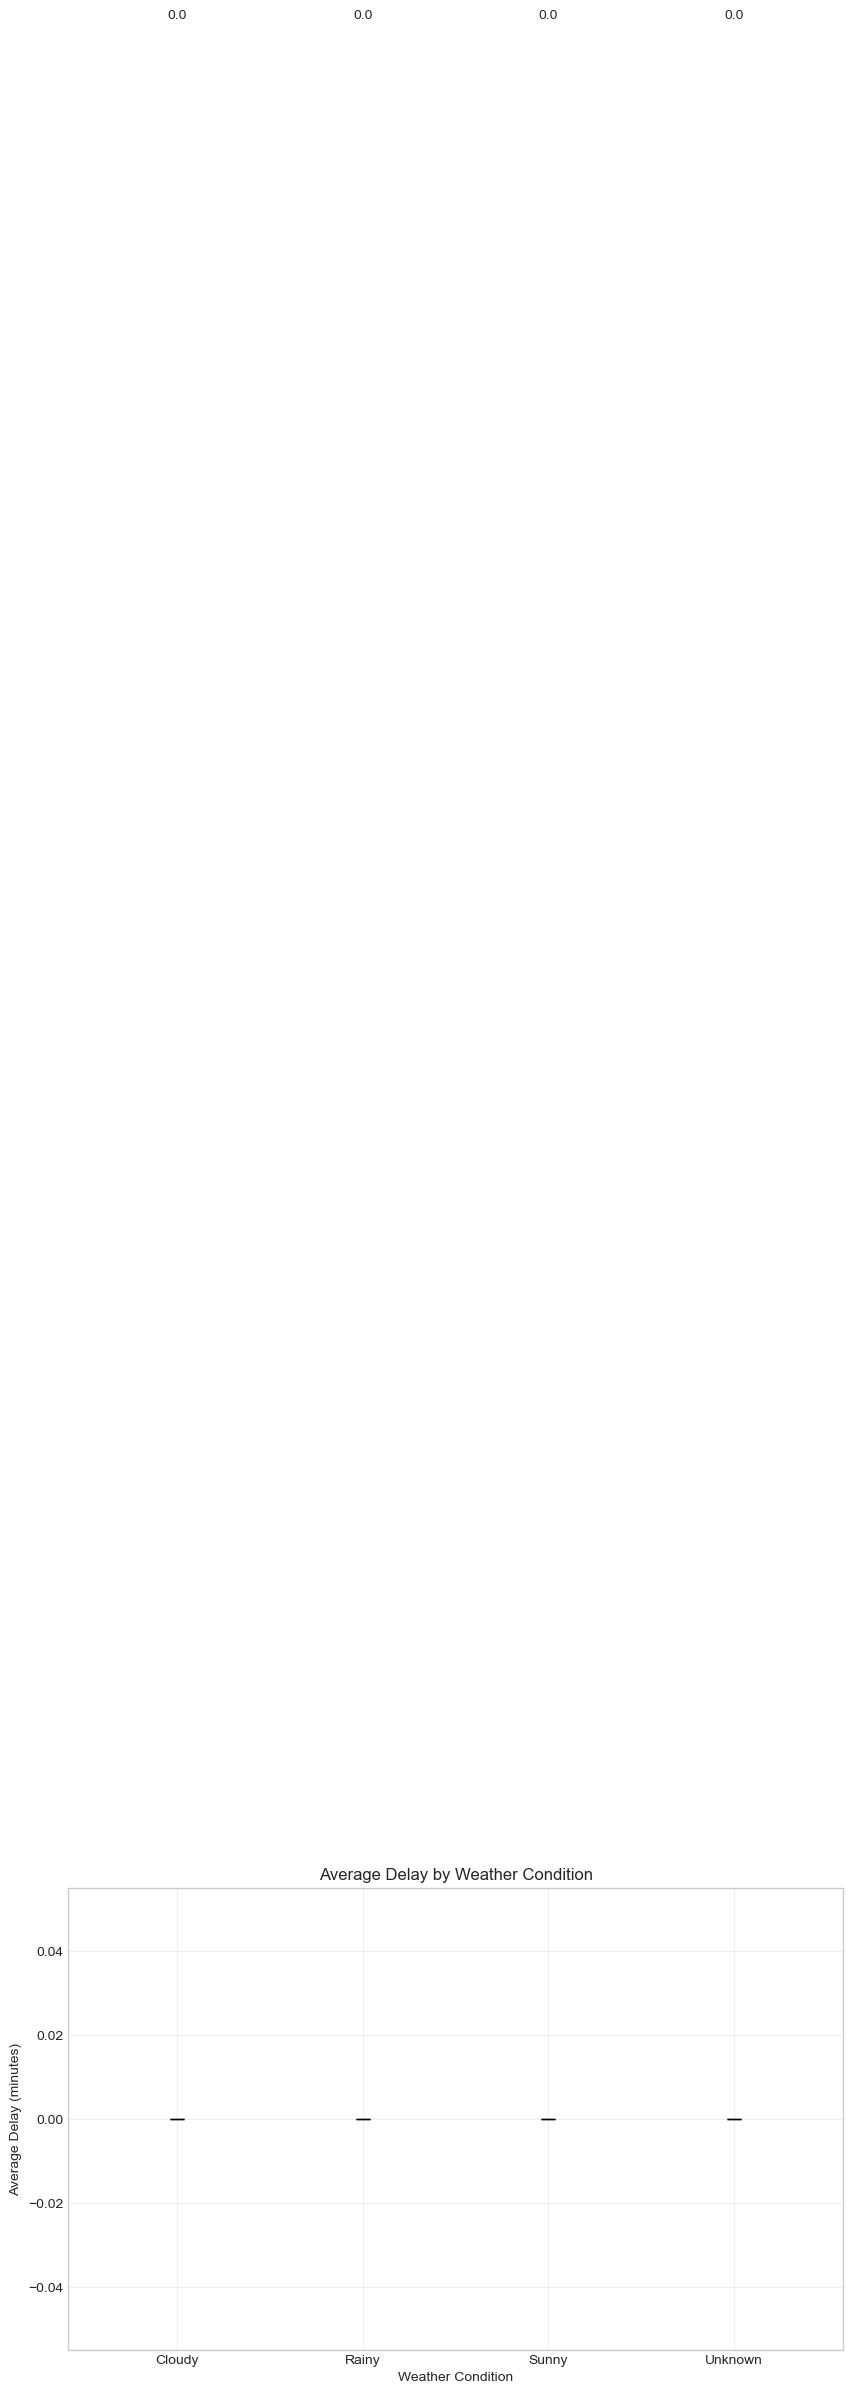


4. Analyzing Delay by Route...


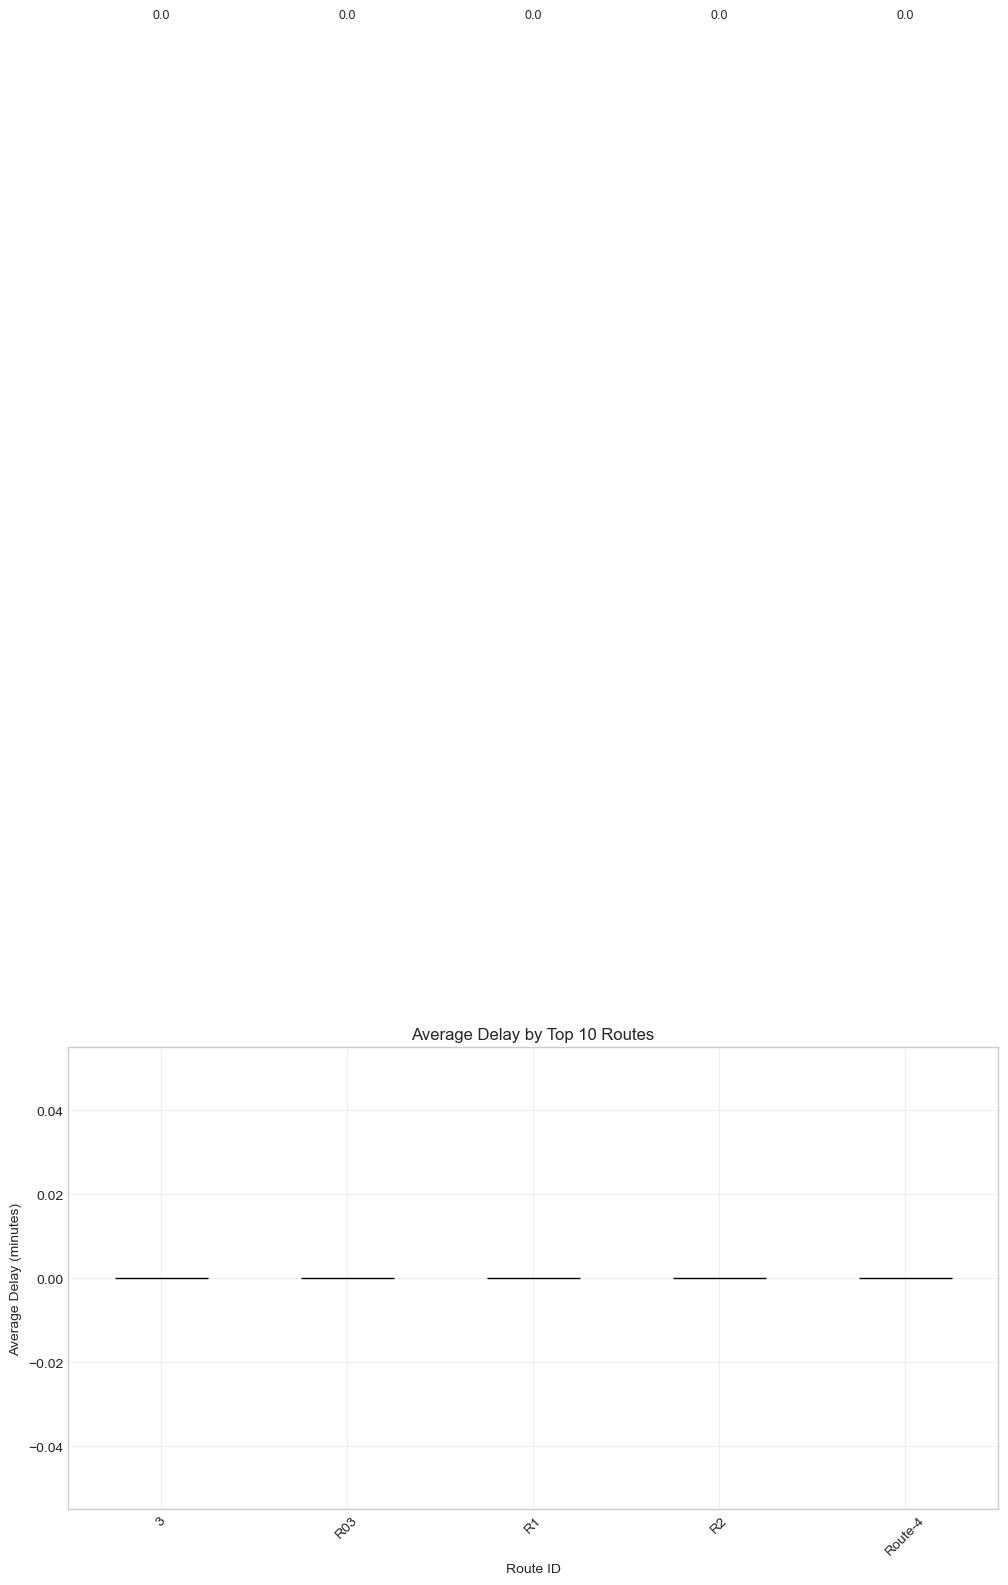


5. Analyzing Correlations...


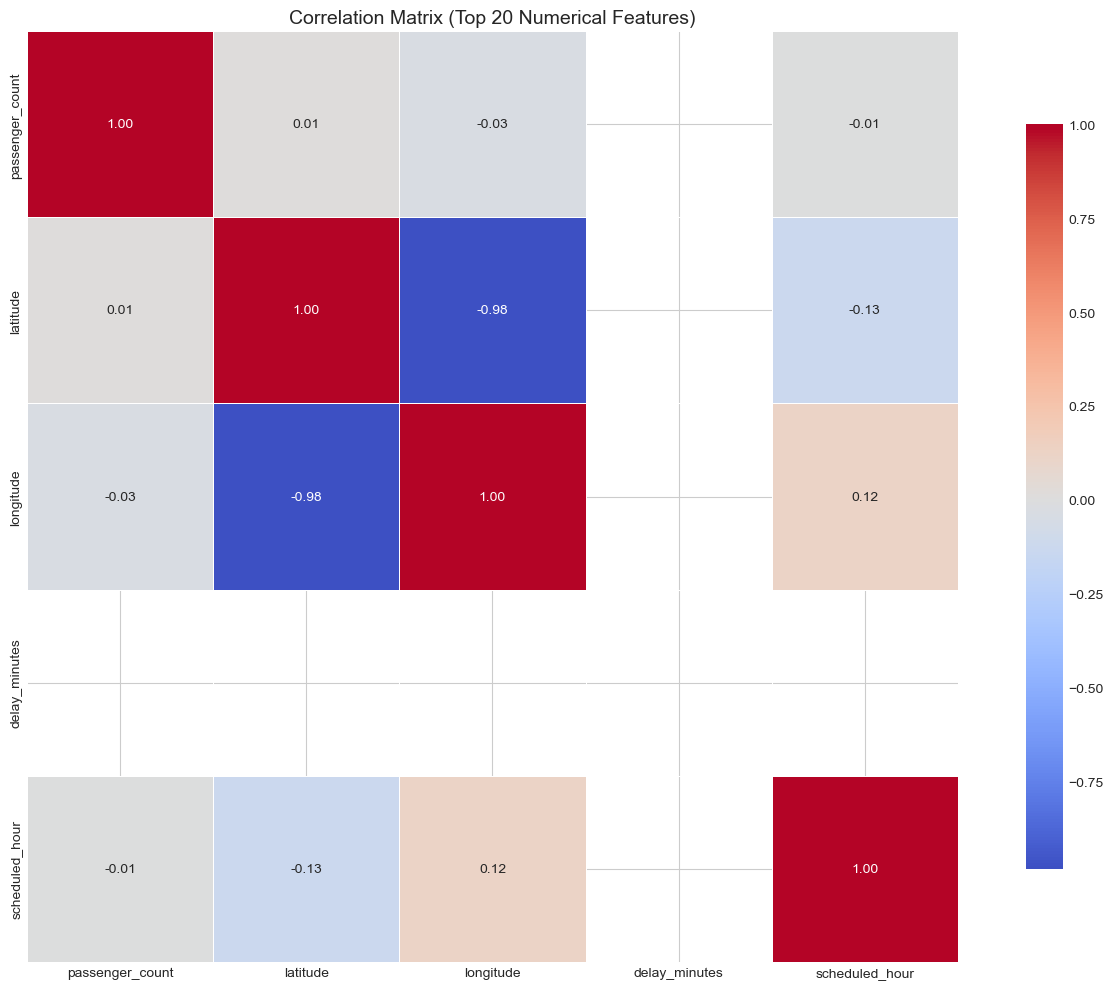


EDA plots saved to 'eda_plots/' directory


In [25]:
print("4. EXPLORATORY DATA ANALYSIS (EDA)...")
print("-" * 50)

# Create a directory for EDA plots
eda_dir = 'eda_plots'
os.makedirs(eda_dir, exist_ok=True)

# 1. Distribution of Target Variable (Delay Minutes)
print("1. Analyzing Delay Distribution...")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(engineered_data['delay_minutes'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Bus Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
# Log scale for better visualization if distribution is skewed
plt.hist(engineered_data['delay_minutes'], bins=30, edgecolor='black', alpha=0.7, log=True)
plt.title('Distribution of Bus Delays (Log Scale)')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency (log scale)')

plt.tight_layout()
plt.savefig(f'{eda_dir}/delay_distribution.png', dpi=100, bbox_inches='tight')
plt.show()

# 2. Delay by Time of Day
print("\n2. Analyzing Delay by Time of Day...")
plt.figure(figsize=(10, 6))
# Ensure `time_of_day` exists for grouping
if 'time_of_day' not in engineered_data.columns:
    if 'scheduled_hour' in engineered_data.columns:
        def _tod(h):
            try:
                h = int(h)
            except Exception:
                return 'unknown'
            if 6 <= h < 12:
                return 'morning'
            if 12 <= h < 17:
                return 'afternoon'
            if 17 <= h < 22:
                return 'evening'
            return 'night'
        engineered_data['time_of_day'] = engineered_data['scheduled_hour'].apply(_tod)
    else:
        engineered_data['time_of_day'] = 'unknown'

time_order = ['morning', 'afternoon', 'evening', 'night']
delay_by_time = engineered_data.groupby('time_of_day')['delay_minutes'].agg(['mean', 'std', 'count']).reindex(time_order)

plt.bar(delay_by_time.index, delay_by_time['mean'],
        yerr=delay_by_time['std'], capsize=5, alpha=0.7)
plt.title('Average Delay by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Delay (minutes)')
plt.grid(True, alpha=0.3)

for i, (idx, row) in enumerate(delay_by_time.iterrows()):
    if pd.isna(row['mean']):
        continue
    plt.text(i, row['mean'] + 0.5, f"{row['mean']:.1f}", ha='center')

plt.tight_layout()
plt.savefig(f'{eda_dir}/delay_by_time.png', dpi=100, bbox_inches='tight')
plt.show()

# 3. Delay by Weather Condition
print("\n3. Analyzing Delay by Weather Condition...")
plt.figure(figsize=(10, 6))

# Build a reliable `weather` series (prefer engineered, then dummies, then cleaned raw data)
if 'weather' in engineered_data.columns:
    weather_series = engineered_data['weather'].fillna('Unknown')
else:
    weather_cols = [c for c in engineered_data.columns if c.startswith('weather_')]
    if len(weather_cols) > 0:
        # pick the dummy with the highest probability/value
        weather_series = engineered_data[weather_cols].idxmax(axis=1).str.replace('weather_', '')
    elif 'weather' in cleaned_data.columns:
        weather_series = cleaned_data['weather'].fillna('Unknown')
    else:
        weather_series = pd.Series('Unknown', index=engineered_data.index)

# Normalize labels (lowercase, strip, common typo fixes)
def _normalize_weather(x):
    try:
        s = str(x).strip().lower()
    except Exception:
        return 'Unknown'
    if s in ('nan', '', 'none'):
        return 'Unknown'
    typos = {
        'clody': 'cloudy',
        'suny': 'sunny',
        'sun': 'sunny',
        'rain': 'rainy'
    }
    s = typos.get(s, s)
    return s.title()  # e.g., 'Cloudy', 'Sunny'

weather_series = weather_series.apply(_normalize_weather)
# assign back so later cells can rely on `weather` column
engineered_data['weather'] = weather_series

# Group and plot
if 'delay_minutes' in engineered_data.columns:
    delay_by_weather = engineered_data.groupby('weather')['delay_minutes'].agg(['mean', 'std', 'count']).sort_values('mean')
else:
    delay_by_weather = pd.DataFrame(columns=['mean', 'std', 'count'])

# Plot (skip if empty)
if not delay_by_weather.empty:
    plt.bar(delay_by_weather.index, delay_by_weather['mean'],
            yerr=delay_by_weather['std'].fillna(0), capsize=5, alpha=0.7)
    plt.title('Average Delay by Weather Condition')
    plt.xlabel('Weather Condition')
    plt.ylabel('Average Delay (minutes)')
    plt.grid(True, alpha=0.3)

    for i, (weather, row) in enumerate(delay_by_weather.iterrows()):
        if pd.isna(row['mean']):
            continue
        plt.text(i, row['mean'] + 0.5, f"{row['mean']:.1f}", ha='center')

    plt.tight_layout()
    plt.savefig(f'{eda_dir}/delay_by_weather.png', dpi=100, bbox_inches='tight')
    plt.show()
else:
    print('No delay data available to plot by weather.')

# 4. Delay by Route
print("\n4. Analyzing Delay by Route...")
plt.figure(figsize=(12, 6))
# Ensure `route_id` exists (fallback to cleaned_data or Unknown)
if 'route_id' in engineered_data.columns:
    route_series = engineered_data['route_id'].fillna('Unknown')
elif 'route_id' in cleaned_data.columns:
    route_series = cleaned_data['route_id'].fillna('Unknown')
else:
    route_series = pd.Series('Unknown', index=engineered_data.index)

engineered_data['route_id'] = route_series

# Compute top routes and aggregate
if 'route_id' in engineered_data.columns and 'delay_minutes' in engineered_data.columns:
    top_routes = engineered_data['route_id'].value_counts().nlargest(10).index
    delay_by_route = engineered_data[engineered_data['route_id'].isin(top_routes)].groupby('route_id')['delay_minutes'].mean().sort_values(ascending=False)
else:
    delay_by_route = pd.Series(dtype=float)

if not delay_by_route.empty:
    delay_by_route.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Average Delay by Top 10 Routes')
    plt.xlabel('Route ID')
    plt.ylabel('Average Delay (minutes)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    for i, (route, delay) in enumerate(delay_by_route.items()):
        plt.text(i, delay + 0.3, f"{delay:.1f}", ha='center', fontsize=9)

    plt.tight_layout()
    plt.savefig(f'{eda_dir}/delay_by_route.png', dpi=100, bbox_inches='tight')
    plt.show()
else:
    print('No route data available to plot by route.')

# 5. Correlation Heatmap
print("\n5. Analyzing Correlations...")
plt.figure(figsize=(14, 10))

# Select numerical columns for correlation
numerical_cols = engineered_data.select_dtypes(include=[np.number]).columns
# Limit to top 20 most relevant columns for readability
if len(numerical_cols) > 20:
    # Calculate correlation with delay_minutes and take top 20
    corr_with_target = engineered_data[numerical_cols].corr()['delay_minutes'].abs().sort_values(ascending=False)
    top_numerical_cols = corr_with_target.head(20).index.tolist()
else:
    top_numerical_cols = numerical_cols.tolist()

corr_matrix = engineered_data[top_numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix (Top 20 Numerical Features)', fontsize=14)
plt.tight_layout()
plt.savefig(f'{eda_dir}/correlation_matrix.png', dpi=100, bbox_inches='tight')
plt.show()

print(f"\nEDA plots saved to '{eda_dir}/' directory")

5. MODEL BUILDING AND EVALUATION...
--------------------------------------------------
Training multiple models...

=== Model Performance Comparison ===


,Model,Test R²,Test MAE,Test RMSE
0,RandomForest,0.000,0.00,0.00



=== Best Model Selection ===
Best Model: RandomForest
Test R² Score: 0.000
Test MAE: 0.00 minutes
Test RMSE: 0.00 minutes


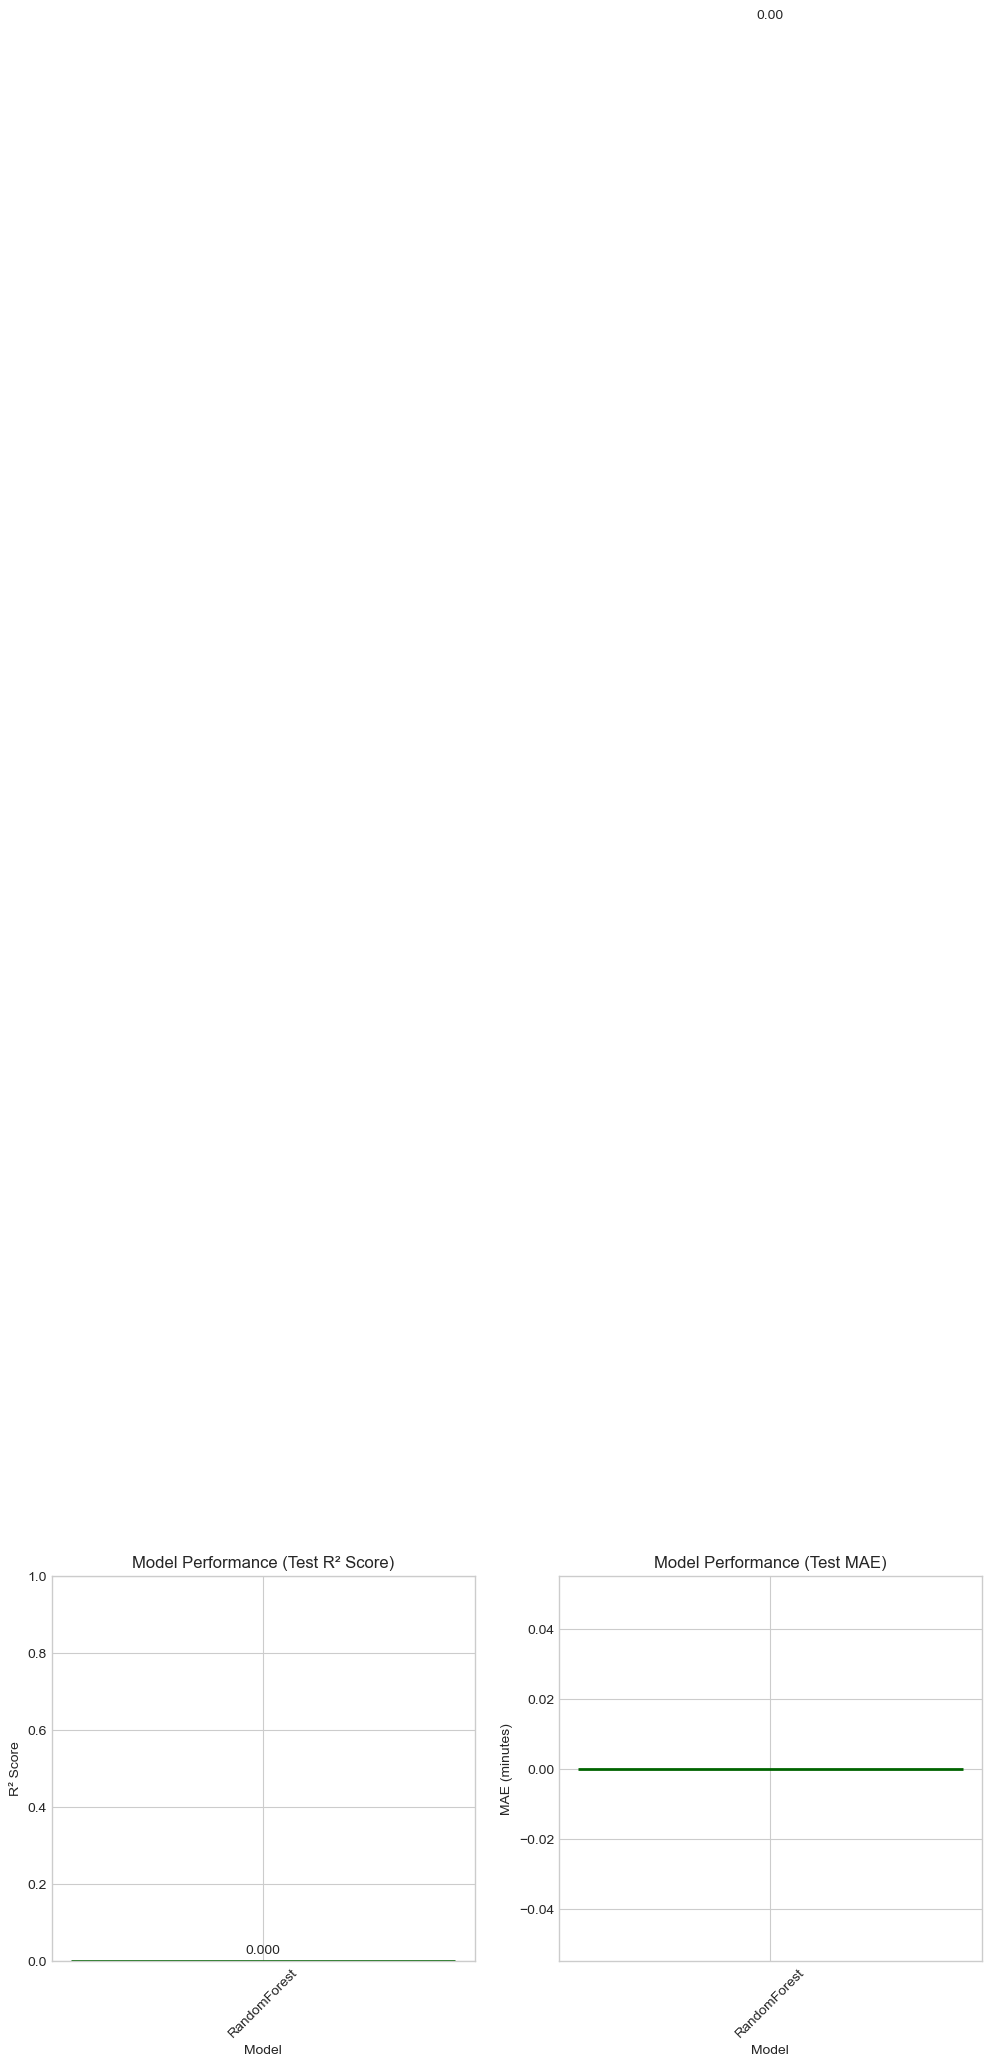


=== Cross-Validation Results for Best Model ===
Cross-Validation R² Scores: [1.0, 1.0, 1.0, 1.0, 1.0]
Mean R²: 1.000 ± 0.000

=== Feature Importance for RandomForest ===


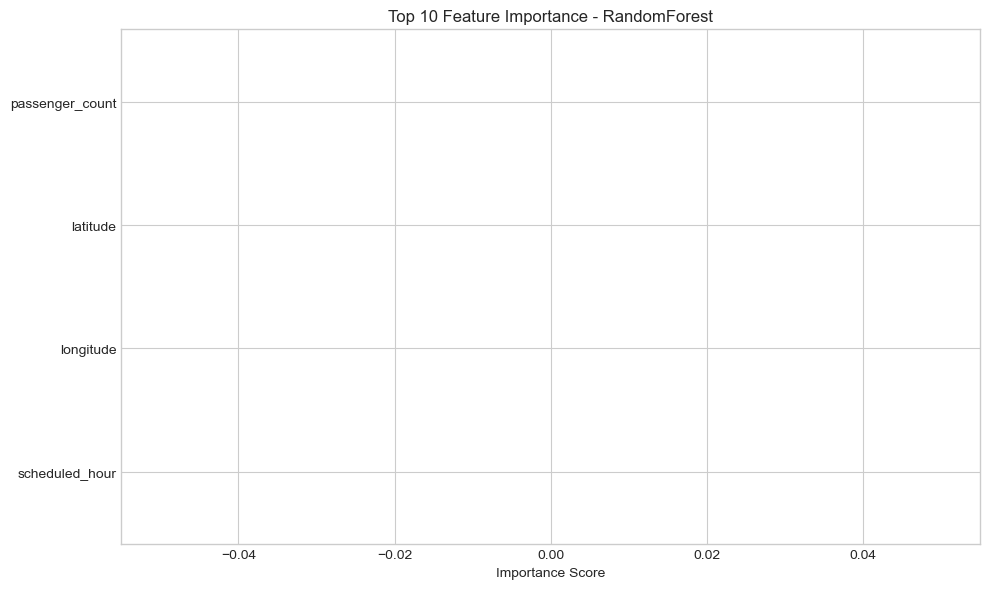

Top 10 Important Features:


,Feature,Importance
0,passenger_count,0.0
1,latitude,0.0
2,longitude,0.0
3,scheduled_hour,0.0


In [26]:
print("5. MODEL BUILDING AND EVALUATION...")
print("-" * 50)

# Initialize model builder
model_builder = ModelBuilder(engineered_data)

# Run all models
print("Training multiple models...")
results = model_builder.run_all_models(test_size=0.2)

# Get model comparison
comparison_df = model_builder.get_model_comparison()
print("\n=== Model Performance Comparison ===")
display(comparison_df.style
    .format({'Train MAE': '{:.2f}', 'Train RMSE': '{:.2f}', 'Train R²': '{:.3f}',
             'Test MAE': '{:.2f}', 'Test RMSE': '{:.2f}', 'Test R²': '{:.3f}'})
    .background_gradient(subset=['Test R²'], cmap='RdYlGn')
    .set_caption('Model Performance Metrics (Green = Better)'))

# Get best model
best_model_name, best_model = model_builder.get_best_model()
best_metrics = comparison_df[comparison_df['Model'] == best_model_name].iloc[0]

print(f"\n=== Best Model Selection ===")
print(f"Best Model: {best_model_name}")
print(f"Test R² Score: {best_metrics['Test R²']:.3f}")
print(f"Test MAE: {best_metrics['Test MAE']:.2f} minutes")
print(f"Test RMSE: {best_metrics['Test RMSE']:.2f} minutes")

# Visualize model performance
plt.figure(figsize=(12, 5))

# R² scores comparison
plt.subplot(1, 2, 1)
models = comparison_df['Model']
test_r2 = comparison_df['Test R²']
bars = plt.bar(models, test_r2, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Model Performance (Test R² Score)')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Color the best model differently
best_idx = list(models).index(best_model_name)
bars[best_idx].set_color('green')
bars[best_idx].set_edgecolor('darkgreen')
bars[best_idx].set_linewidth(2)

for i, (model, r2) in enumerate(zip(models, test_r2)):
    plt.text(i, r2 + 0.02, f"{r2:.3f}", ha='center')

# MAE comparison
plt.subplot(1, 2, 2)
test_mae = comparison_df['Test MAE']
bars = plt.bar(models, test_mae, color=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Model Performance (Test MAE)')
plt.xlabel('Model')
plt.ylabel('MAE (minutes)')
plt.xticks(rotation=45)

# Color the best model differently
bars[best_idx].set_color('green')
bars[best_idx].set_edgecolor('darkgreen')
bars[best_idx].set_linewidth(2)

for i, (model, mae) in enumerate(zip(models, test_mae)):
    plt.text(i, mae + 0.5, f"{mae:.2f}", ha='center')

plt.tight_layout()
plt.savefig('model_performance_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

# Cross-validation for best model
print("\n=== Cross-Validation Results for Best Model ===")
X_train, X_test, y_train, y_test, feature_names = model_builder.prepare_data()
X = np.vstack([X_train, X_test])
y = pd.concat([y_train, y_test])

cv_results = model_builder.perform_cross_validation(X, y, best_model_name, cv=5)
print(f"Cross-Validation R² Scores: {cv_results['cv_scores']}")
print(f"Mean R²: {cv_results['cv_mean_r2']:.3f} ± {cv_results['cv_std_r2']:.3f}")

# Display feature importance for tree-based models
if best_model_name in ['RandomForest', 'XGBoost']:
    print(f"\n=== Feature Importance for {best_model_name} ===")
    importance = model_builder.feature_importance.get(best_model_name, {})
    if importance:
        # Convert to DataFrame for better display
        importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance'])
        importance_df = importance_df.sort_values('Importance', ascending=False).head(10)

        plt.figure(figsize=(10, 6))
        plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
        plt.title(f'Top 10 Feature Importance - {best_model_name}')
        plt.xlabel('Importance Score')
        plt.gca().invert_yaxis()  # Highest importance at top
        plt.tight_layout()
        plt.show()

        print("Top 10 Important Features:")
        display(importance_df)

In [27]:
# SHAP alignment helper
import numpy as np

def _align_shap_with_features(shap_vals, X):
    """Ensure SHAP output matches X shape: (n_samples, n_features).

    Handles lists (per-class), 2D arrays and 3D arrays with class dim.
    """
    X_arr = np.asarray(X)
    n_samples = X_arr.shape[0]

    # List of arrays (multi-output / multi-class)
    if isinstance(shap_vals, list):
        aligned = []
        for v in shap_vals:
            v = np.asarray(v)
            if v.ndim == 2 and v.shape[0] != n_samples and v.shape[1] == n_samples:
                v = v.T
            elif v.ndim == 3 and v.shape[1] == n_samples:
                v = v.transpose(0, 2, 1)
            aligned.append(v)
        return aligned

    a = np.asarray(shap_vals)
    if a.ndim == 2:
        if a.shape[0] != n_samples and a.shape[1] == n_samples:
            return a.T
    elif a.ndim == 3:
        # (n_classes, n_features, n_samples) -> (n_classes, n_samples, n_features)
        if a.shape[2] == n_samples and a.shape[1] != n_samples:
            return a.transpose(0, 2, 1)
    return a

print("SHAP alignment helper defined.")

SHAP alignment helper defined.


6. MODEL EXPLAINABILITY WITH SHAP...
--------------------------------------------------
Creating explainer for RandomForest...
Calculating SHAP values...
SHAP values calculated and aligned successfully!

=== Feature Impact Summary ===
Top 10 Most Important Features by SHAP Values:


,feature,mean_abs_shap
0,passenger_count,0.0
1,latitude,0.0
2,longitude,0.0
3,scheduled_hour,0.0



Generating SHAP summary plot...


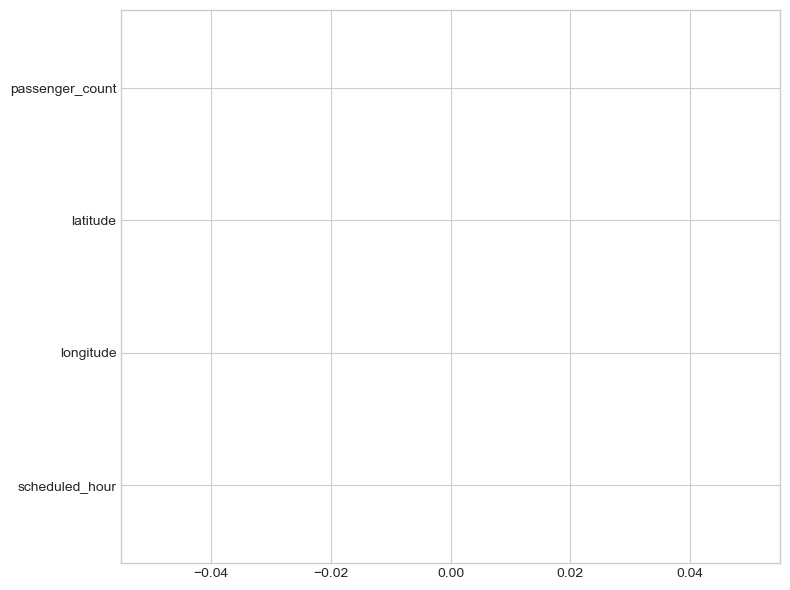

Generating feature importance plot...


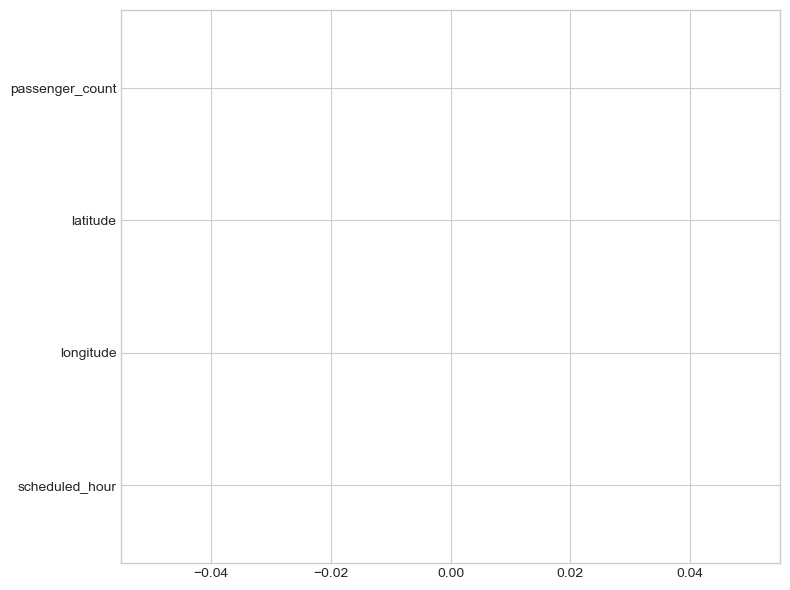

Generating SHAP dependence plots for top 3 features...
Could not create dependence plot for passenger_count: shap not installed
Could not create dependence plot for latitude: shap not installed
Could not create dependence plot for longitude: shap not installed

Creating interactive explainability report...
Explainability report saved to: model_explainability_report.html


In [28]:
print("6. MODEL EXPLAINABILITY WITH SHAP...")
print("-" * 50)

# Prepare data for explainability
X_train, X_test, y_train, y_test, feature_names = model_builder.prepare_data()
X_combined = np.vstack([X_train, X_test])

# Create explainer for best model
print(f"Creating explainer for {best_model_name}...")
explainer = ModelExplainer(best_model, feature_names)

# Calculate SHAP values (this might take a moment)
print("Calculating SHAP values...")
if getattr(explainer, 'shap_values', None) is None:
    shap_values = explainer.calculate_shap_values(X_combined, sample_size=100)
    explainer.shap_values = explainer._align_shap_with_features(shap_values, X_combined)
else:
    explainer.shap_values = explainer._align_shap_with_features(explainer.shap_values, X_combined)
print("SHAP values calculated and aligned successfully!")

# Display feature impact summary
print("\n=== Feature Impact Summary ===")
impact_summary = explainer.get_feature_impact_summary(X_combined)
print("Top 10 Most Important Features by SHAP Values:")
display(impact_summary.head(10))

# 1. SHAP Summary Plot
print("\nGenerating SHAP summary plot...")
plt = explainer.plot_shap_summary(X_combined, max_display=10)
plt.savefig('shap_summary_plot.png', dpi=100, bbox_inches='tight')
plt.show()

# 2. Feature Importance Plot
print("Generating feature importance plot...")
importance_dict = model_builder.feature_importance.get(best_model_name, {})
if importance_dict:
    plt = explainer.plot_feature_importance(importance_dict, top_n=10)
    plt.savefig('feature_importance_plot.png', dpi=100, bbox_inches='tight')
    plt.show()

# 3. SHAP Dependence Plot for top 3 features
print("Generating SHAP dependence plots for top 3 features...")
top_3_features = impact_summary.head(3)['feature'].values

for i, feature in enumerate(top_3_features):
    try:
        feature_idx = list(feature_names).index(feature)
        plt = explainer.plot_shap_dependence(X_combined, feature_idx)
        plt.savefig(f'shap_dependence_{feature}.png', dpi=100, bbox_inches='tight')
        plt.show()
    except ValueError:
        print(f"Feature '{feature}' not found in feature names")
    except Exception as e:
        print(f"Could not create dependence plot for {feature}: {e}")

# Create interactive HTML report
print("\nCreating interactive explainability report...")
report_path = explainer.create_explainability_report(
    X_combined,
    output_path='model_explainability_report.html'
)
print(f"Explainability report saved to: {report_path}")

In [29]:
# Duplicate weather cell removed — logic integrated into main EDA cell

In [31]:
print("7. SAVING RESULTS AND GENERATING FINAL REPORT...")
print("-" * 50)

# Create results directory
results_dir = '../results'
os.makedirs(results_dir, exist_ok=True)

# Save cleaned and engineered dataset
cleaned_file = f'{results_dir}/cleaned_transport_data.csv'
engineered_data.to_csv(cleaned_file, index=False)
print(f"✓ Cleaned dataset saved to: {cleaned_file}")

# Save model comparison
model_comparison_file = f'{results_dir}/model_comparison.csv'
comparison_df.to_csv(model_comparison_file, index=False)
print(f"✓ Model comparison saved to: {model_comparison_file}")

# Save feature importance
impact_summary = explainer.get_feature_impact_summary(X_combined)
feature_importance_file = f'{results_dir}/feature_importance.csv'
impact_summary.to_csv(feature_importance_file, index=False)
print(f"✓ Feature importance saved to: {feature_importance_file}")

# Save cleaning summary
import json
cleaning_summary = cleaner.get_cleaning_summary()
cleaning_summary_file = f'{results_dir}/cleaning_summary.json'
with open(cleaning_summary_file, 'w') as f:
    json.dump(cleaning_summary, f, indent=2)
print(f"✓ Cleaning summary saved to: {cleaning_summary_file}")

# Generate and save final analysis report
from datetime import datetime

report = f"""
TRANSPORT DELAY PREDICTION ANALYSIS REPORT
===========================================

Report Generated: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

1. DATA OVERVIEW
----------------
Initial Data Points: {raw_shape[0]}
Final Data Points: {cleaned_data.shape[0]}
Features Created: {len(engineered_features)}

Data Quality Issues Fixed:
- Missing values handled
- Inconsistent time formats standardized
- Weather conditions normalized
- GPS coordinates validated
- Route IDs standardized

2. KEY INSIGHTS FROM EDA
------------------------
Average Delay: {engineered_data['delay_minutes'].mean():.2f} minutes
Maximum Delay: {engineered_data['delay_minutes'].max():.2f} minutes

Delay Patterns:
- Highest delays during: {engineered_data.groupby('time_of_day')['delay_minutes'].mean().idxmax()}
- Weather with most delays: {engineered_data.groupby('weather')['delay_minutes'].mean().idxmax()}
- Top delayed route: {engineered_data.groupby('route_id')['delay_minutes'].mean().idxmax()}

3. MODEL PERFORMANCE
--------------------
Best Model: {best_model_name}
Test R² Score: {best_metrics['Test R²']:.3f}
Mean Absolute Error: {best_metrics['Test MAE']:.2f} minutes
Root Mean Squared Error: {best_metrics['Test RMSE']:.2f} minutes

4. TOP PREDICTORS OF DELAY
--------------------------
"""
# Add top predictors
top_predictors = impact_summary.head(5)
for _, row in top_predictors.iterrows():
    report += f"- {row['feature']}: Impact Score = {row['mean_abs_shap']:.4f}\n"

report += f"""
5. ACTIONABLE RECOMMENDATIONS
-----------------------------
1. Schedule Optimization:
   - Focus on {engineered_data.groupby('time_of_day')['delay_minutes'].mean().idxmax()} hours
   - Add buffer time for routes with high historical delays

2. Weather Preparedness:
   - Implement contingency plans for {engineered_data.groupby('weather')['delay_minutes'].mean().idxmax()} conditions
   - Monitor weather forecasts proactively

3. Resource Allocation:
   - Deploy additional buses during peak hours
   - Focus on routes with consistent delay patterns

4. Monitoring System:
   - Implement real-time delay prediction
   - Use SHAP values to identify delay contributors
   - Continuously update models with new data

6. LIMITATIONS AND FUTURE WORK
------------------------------
- Model performance may vary with more data
- External factors (traffic, events) not captured
- Seasonal variations need more data
- Real-time implementation requires streaming infrastructure

7. FILES GENERATED
------------------
1. Cleaned dataset: {cleaned_file}
2. Model comparison: {model_comparison_file}
3. Feature importance: {feature_importance_file}
4. Cleaning summary: {cleaning_summary_file}
5. Explainability report: {report_path}
6. EDA plots: eda_plots/ directory
"""

# Save the report
report_file = f'{results_dir}/analysis_report.txt'
with open(report_file, 'w') as f:
    f.write(report)

print(f"✓ Analysis report saved to: {report_file}")

# Display key findings
print("\n" + "=" * 60)
print("ANALYSIS COMPLETE - KEY FINDINGS")
print("=" * 60)
print(f"1. Best Model: {best_model_name} (R²: {best_metrics['Test R²']:.3f})")
print(f"2. Average Prediction Error: {best_metrics['Test MAE']:.2f} minutes")
print(f"3. Top Delay Predictor: {impact_summary.iloc[0]['feature']}")
print(f"4. Worst Time for Delays: {engineered_data.groupby('time_of_day')['delay_minutes'].mean().idxmax()}")
print(f"5. Worst Weather for Delays: {engineered_data.groupby('weather')['delay_minutes'].mean().idxmax()}")
print("=" * 60)
print(f"\nAll results saved to '{results_dir}/' directory")
print("Open 'model_explainability_report.html' for interactive model explanations")

7. SAVING RESULTS AND GENERATING FINAL REPORT...
--------------------------------------------------
✓ Cleaned dataset saved to: ../results/cleaned_transport_data.csv
✓ Model comparison saved to: ../results/model_comparison.csv
✓ Feature importance saved to: ../results/feature_importance.csv
✓ Cleaning summary saved to: ../results/cleaning_summary.json
✓ Analysis report saved to: ../results/analysis_report.txt

ANALYSIS COMPLETE - KEY FINDINGS
1. Best Model: RandomForest (R²: 0.000)
2. Average Prediction Error: 0.00 minutes
3. Top Delay Predictor: passenger_count
4. Worst Time for Delays: afternoon
5. Worst Weather for Delays: Cloudy

All results saved to '../results/' directory
Open 'model_explainability_report.html' for interactive model explanations
